In [11]:
# Dependencies
import tweepy
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
style.use("ggplot")
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
# Target the News Accounts
target = ("@OhioGOP","@OHDems")

# Variables for DataFrame
media_sources = []
text = []
date = []
tweets_ago = []

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Tweet Counter
counter = 1

# Loop through each user
for user in target:
    
    # Tweet counter per target
    tweet_count = 0

    # Loop through 2 pages of tweets (total 40 tweets)
    for x in range(1,6):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page = x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Add to target Tweet count
            tweet_count += 1
            
            # Print Tweets
            print(f"Tweet {counter}: {tweet['text']}")
            
            # Run Vader Analysis
            results = analyzer.polarity_scores(tweet["text"])
            compound = results ["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            
             # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            media_sources.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)      
            
            
            # Add to counter
            counter += 1

Tweet 1: . @RichCordray is bragging that 100 people came to an event at his home yesterday. He must have missed that 3,000 p… https://t.co/v9w9FeWX1W
Tweet 2: RT @WhiteHouse: Judge Brett Kavanaugh has a "connection with nearly every justice" on the Supreme Court and a "reputation as a straight-sho…
Tweet 3: So if this is the case, please tell us why @RichCordray did NOTHING as Ohio Attorney General from 2009-2011? 🤔 https://t.co/yANJx6HQwR
Tweet 4: RT @Yost4Ohio: Who’s defending the big drug companies in court, fighting against Ohio’s families?

Steve Dettelbach’s law firm, that’s who!…
Tweet 5: RT @Yost4Ohio: A lawyer must ethically disclose conflicts of interest to his clients.

@SteveDettelbach has a whopper of a conflict — his f…
Tweet 6: RT @JonHusted: Since we’ve made it easier 2 start a business in #Ohio 4 in 5 companies are now started online &amp; we've seen a 46.3% increase…
Tweet 7: Sign our petition to show your support for Judge Kavanaugh and tell @SherrodBrown to stop pla

Tweet 61: RT @BenWSYX6: .@JonHusted says this is a major difference between @MikeDeWine and @RichCordray. He says Cordray favors status quo and measu…
Tweet 62: RT @BenWSYX6: .@JonHusted says he told the Ohio State Medical Association both @MikeDeWine and he believe people should not be denied cover…
Tweet 63: RT @DeWineHustedOH: .@JonHusted: @MikeDeWine &amp; I are proud today to be recommended by your doctor! #OHGov #DHFO2018 https://t.co/PKC1Fug3QP
Tweet 64: RT @DeWineHustedOH: .@MikeDeWine: We support a reasonable work requirement for the adults on Medicaid Expansion who are healthy and able to…
Tweet 65: RT @DeWineHustedOH: NOW: Ohio State Medical Association Endorses @MikeDeWine &amp; @JonHusted for Governor &amp; Lt. Governor of Ohio. https://t.co…
Tweet 66: After President Trump nominated Judge Kavanaugh for #SCOTUS @SherrodBrown said he has "serious concerns". That wasn… https://t.co/5Xk0ixy4Qw
Tweet 67: Ted Strickland, @RichCordray and the Democrats left Ohio with 89 cents in

Tweet 121: RT @DavidPepper: A cartoon's worth a thousand words. 

In this case, even more. 

@DispatchAlerts calls out DeWine for being entirely untru…
Tweet 122: RT @JacobNPetersOH: So despite @Troy_Balderson getting fundraisers with @VP, @SpeakerRyan (twice), and the entire OH GOP delegation, he was…
Tweet 123: RT @RandyLudlow: Ohio special US House election: Faith, family drive Democrat @dannyoconnor1's approach to public office. #OH12 https://t.c…
Tweet 124: RT @CaseyforOhio: I really enjoyed sharing my thoughts and experiences on the #OHDEMS Podcast! I am looking forward to fighting shoulder to…
Tweet 125: RT @ChrisEClevenger: Two of my favorite candidates running for the #OHLEG this year! Check out @Lauren4Ohio and @CaseyforOhio today! #OHPOL…
Tweet 126: RT @TRumbalski: Are public education, economic opportunity, healthcare, and having a representative willing to work across the aisle to get…
Tweet 127: @HarlemFlipper @Lauren4Ohio @CaseyforOhio @OhioHouseDems  https://t.co/cHWTsq

In [13]:
# Convert sentiments to a DataFrame
df = pd.DataFrame({ "Media":media_sources,
                           "Tweet":text,
                            "Date":date,
                            "Compound Score":compound_list,
                            "Positive Score": positive_list,
                            "Neutral Score": neutral_list,
                            "Negative Score":negative_list,
                            "Tweets Ago": tweets_ago})

In [14]:
# Rearrange columns of DataFrame 
df = df[["Media","Date","Tweet","Compound Score","Positive Score","Negative Score","Neutral Score", "Tweets Ago"]]

df.head()

,Media,Date,Tweet,Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,@OhioGOP,Mon Jul 16 23:46:49 +0000 2018,. @RichCordray is bragging that 100 people cam...,-0.2960,0.000,0.095,0.905,1
1,@OhioGOP,Mon Jul 16 20:59:13 +0000 2018,"RT @WhiteHouse: Judge Brett Kavanaugh has a ""c...",0.7906,0.292,0.000,0.708,2
2,@OhioGOP,Mon Jul 16 20:13:39 +0000 2018,"So if this is the case, please tell us why @Ri...",0.3182,0.099,0.000,0.901,3
3,@OhioGOP,Mon Jul 16 19:58:42 +0000 2018,RT @Yost4Ohio: Who’s defending the big drug co...,-0.4199,0.000,0.128,0.872,4
4,@OhioGOP,Mon Jul 16 19:58:22 +0000 2018,RT @Yost4Ohio: A lawyer must ethically disclos...,-0.2263,0.126,0.205,0.669,5


In [15]:
# Subset DataFrame by each Media Source 
Dem = df.loc[df["Media"] == "@OHDems"]
Rep = df.loc[df["Media"] == "@OhioGOP"]


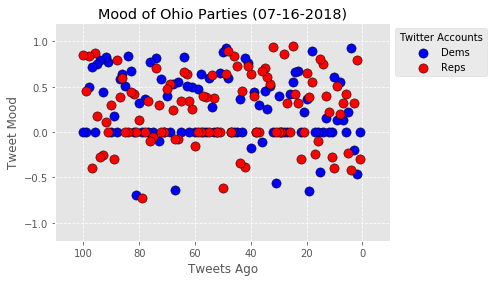

In [18]:
# Create scatter plots
plt.scatter(Dem['Tweets Ago'], Dem['Compound Score'], c='blue',edgecolor='black', s=85, alpha=1, label='Dems')
plt.scatter(Rep['Tweets Ago'], Rep['Compound Score'], c='red',edgecolor='black', s=85, alpha=1, label='Reps')



# Incorporate other Plot features
now = datetime.now()
now = now.strftime("%m-%d-%Y")

plt.title(f"Mood of Ohio Parties ({now})") 
plt.xlabel("Tweets Ago")
plt.xlim(110,-10)
plt.ylabel("Tweet Mood")
plt.ylim(-1.2,1.2)
plt.legend(bbox_to_anchor=(1, 1), title='Twitter Accounts')
plt.grid(True, ls='dashed')



plt.show()